In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Vlaswinkel, Koen (1016271)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

The biggest influence for me was using the SGD optimizer instead of the RMSprop optimizer. The latter one only sometimes worked, but never above 70%. In most cases, it simply didn't train and did not get better than 20%. Making models somewhat simpler can still achieve a 70% accuracy, but not too few nodes. Right now, the model is working quite well, with a 76% accuracy on a non-preprocessed data with a non-CNN network for image data.  (length: 440)



Max val score: 76.39%


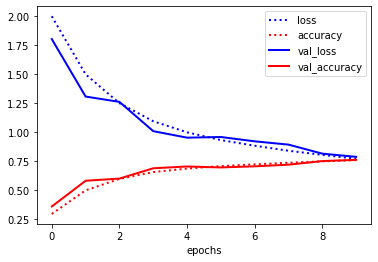

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 3072)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_44 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_45 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_46 (Dense)             (None, 32)                4032      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                330       
Total params: 1,697,487
Trainable params: 1,697,487
Non-trainable params: 0
___________________________________________

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(250, activation='relu'))
    model.add(layers.Dense(125, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



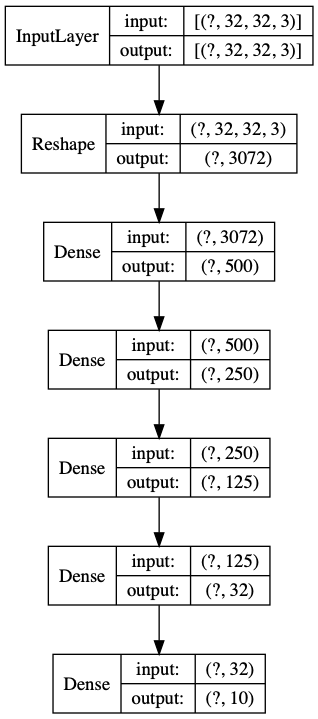

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

Because the model created in 1.1 was already quite complex, the accuracy of the model does not change that much. However, due to the reduced complexity in the data, it is now probably possible to reduce the complexity of the model. I have not done this here because I assume we need to use the same model for this question.  (length: 325)



Max val score: 75.31%


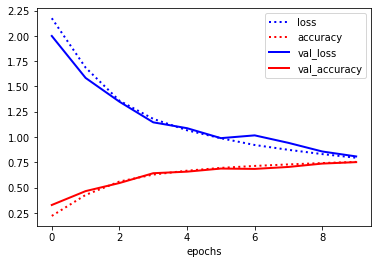

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_41 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_258 (Dense)            (None, 500)               512500    
_________________________________________________________________
dense_259 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_260 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_261 (Dense)            (None, 32)                4032      
_________________________________________________________________
dense_262 (Dense)            (None, 10)                330       
Total params: 673,487
Trainable params: 673,487
Non-trainable params: 0
_______________________________________________

In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

Regularization results in less "jumping up and down" of the accuracy, but does not result in a better model for this model. Changing the batch size to be smaller results in more overfitting, while changing it to be larger results in a worse accuracy. I've increased the number of epochs from 10 to 20, which results in a somewhat better accuracy of 80%. However, increasing it further does not result in any further improvements.  (length: 431)



Max val score: 80.15%


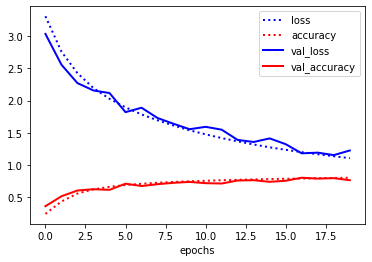

def build_model_1_3():
    alpha = 0.001
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(alpha)))
    model.add(layers.Dense(250, activation='relu', kernel_regularizer=regularizers.l2(alpha)))
    model.add(layers.Dense(125, activation='relu', kernel_regularizer=regularizers.l2(alpha)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(alpha)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

The model design is based mostly on experimentation. In contrast to the previous model, switching to an SDG optimizer did not result in an improvement over the RMSprop optimizer, in this case it resulted in a worse accuracy. By using both convolutional layers and some dense layers, the strengths of the two different layers are combined. Drop-out and L2 are used to prevent over-fitting of the model, which did succeed because there is no large difference between the test and validation accuracy. Using less than 20 epochs results in a lower accuracy, so I have set the number of epochs to 25 to achieve peak performance. The final model works quite well with a 92% accuracy on the validation dataset.  (length: 705)



Max val score: 92.05%


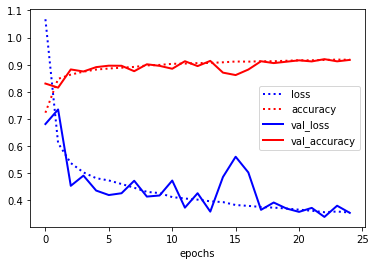

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_41 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_130 (Dropout)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_131 (Dropout)        (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 11, 11, 128)     

def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.D

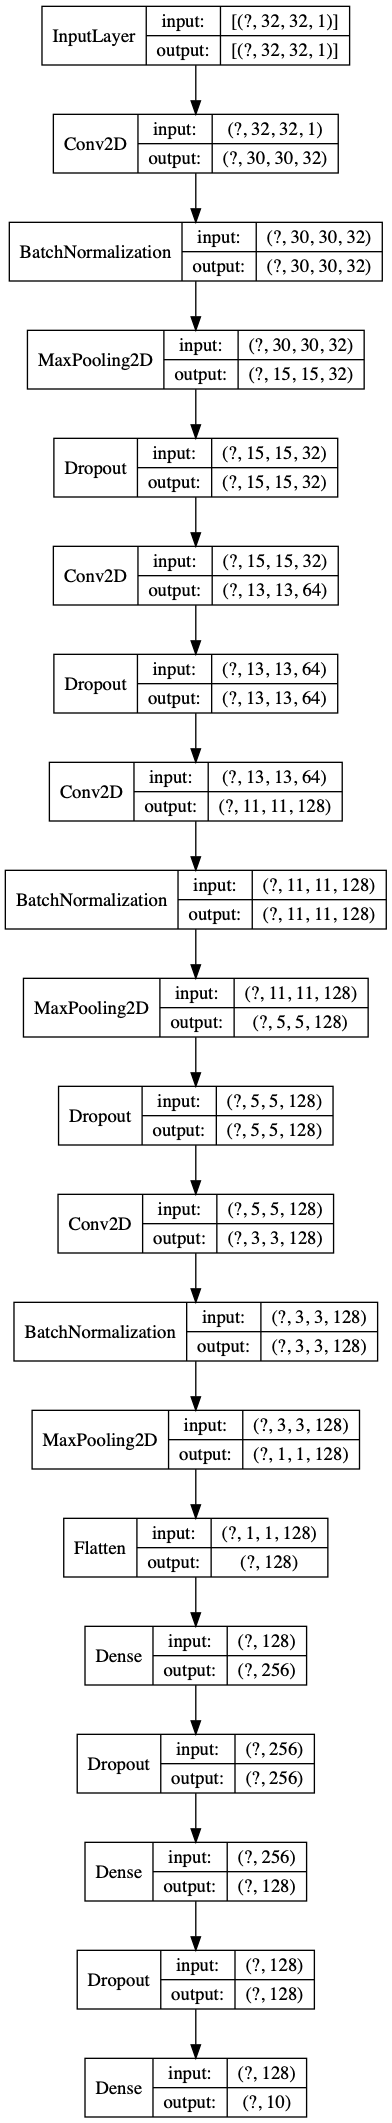

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

Based on the domain of the data, it would be expected that images are shifted, rotated, and zoomed. However, flips are unlikely because those would also be very hard to read for humans and photographs are generally expected to have the correct horizon. Therefore, I did not flip the data and only made small rotations, rotations and zooms. This results in a model that is about as good as the model for 2.1, but it would be expected to deal with small transformations better.  (length: 477)



Max val score: 91.76%


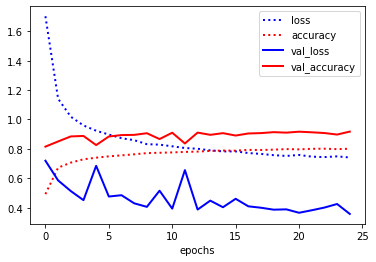


datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=20,
    zoom_range=0.4
)


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

classes, particularly if they are somewhat rotated. The other often confused classes are those that are rounded, i.e. 0, 6, 8 and 9. These all follow very similar structure of their shapes, so it can be hard to distinguish between them. For the second part, I focused on the number 0. Almost all cases are a confusion between 0 and 6, 8, or 9 due to their high level of similarity. Almost all other misclassifications are due to low levels of light, where it is even hard for me to make out what the actual number is. (length: 518)

Test score: 0.92%


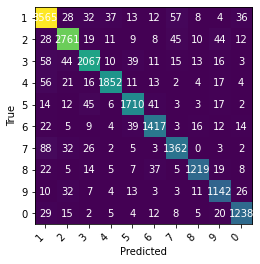

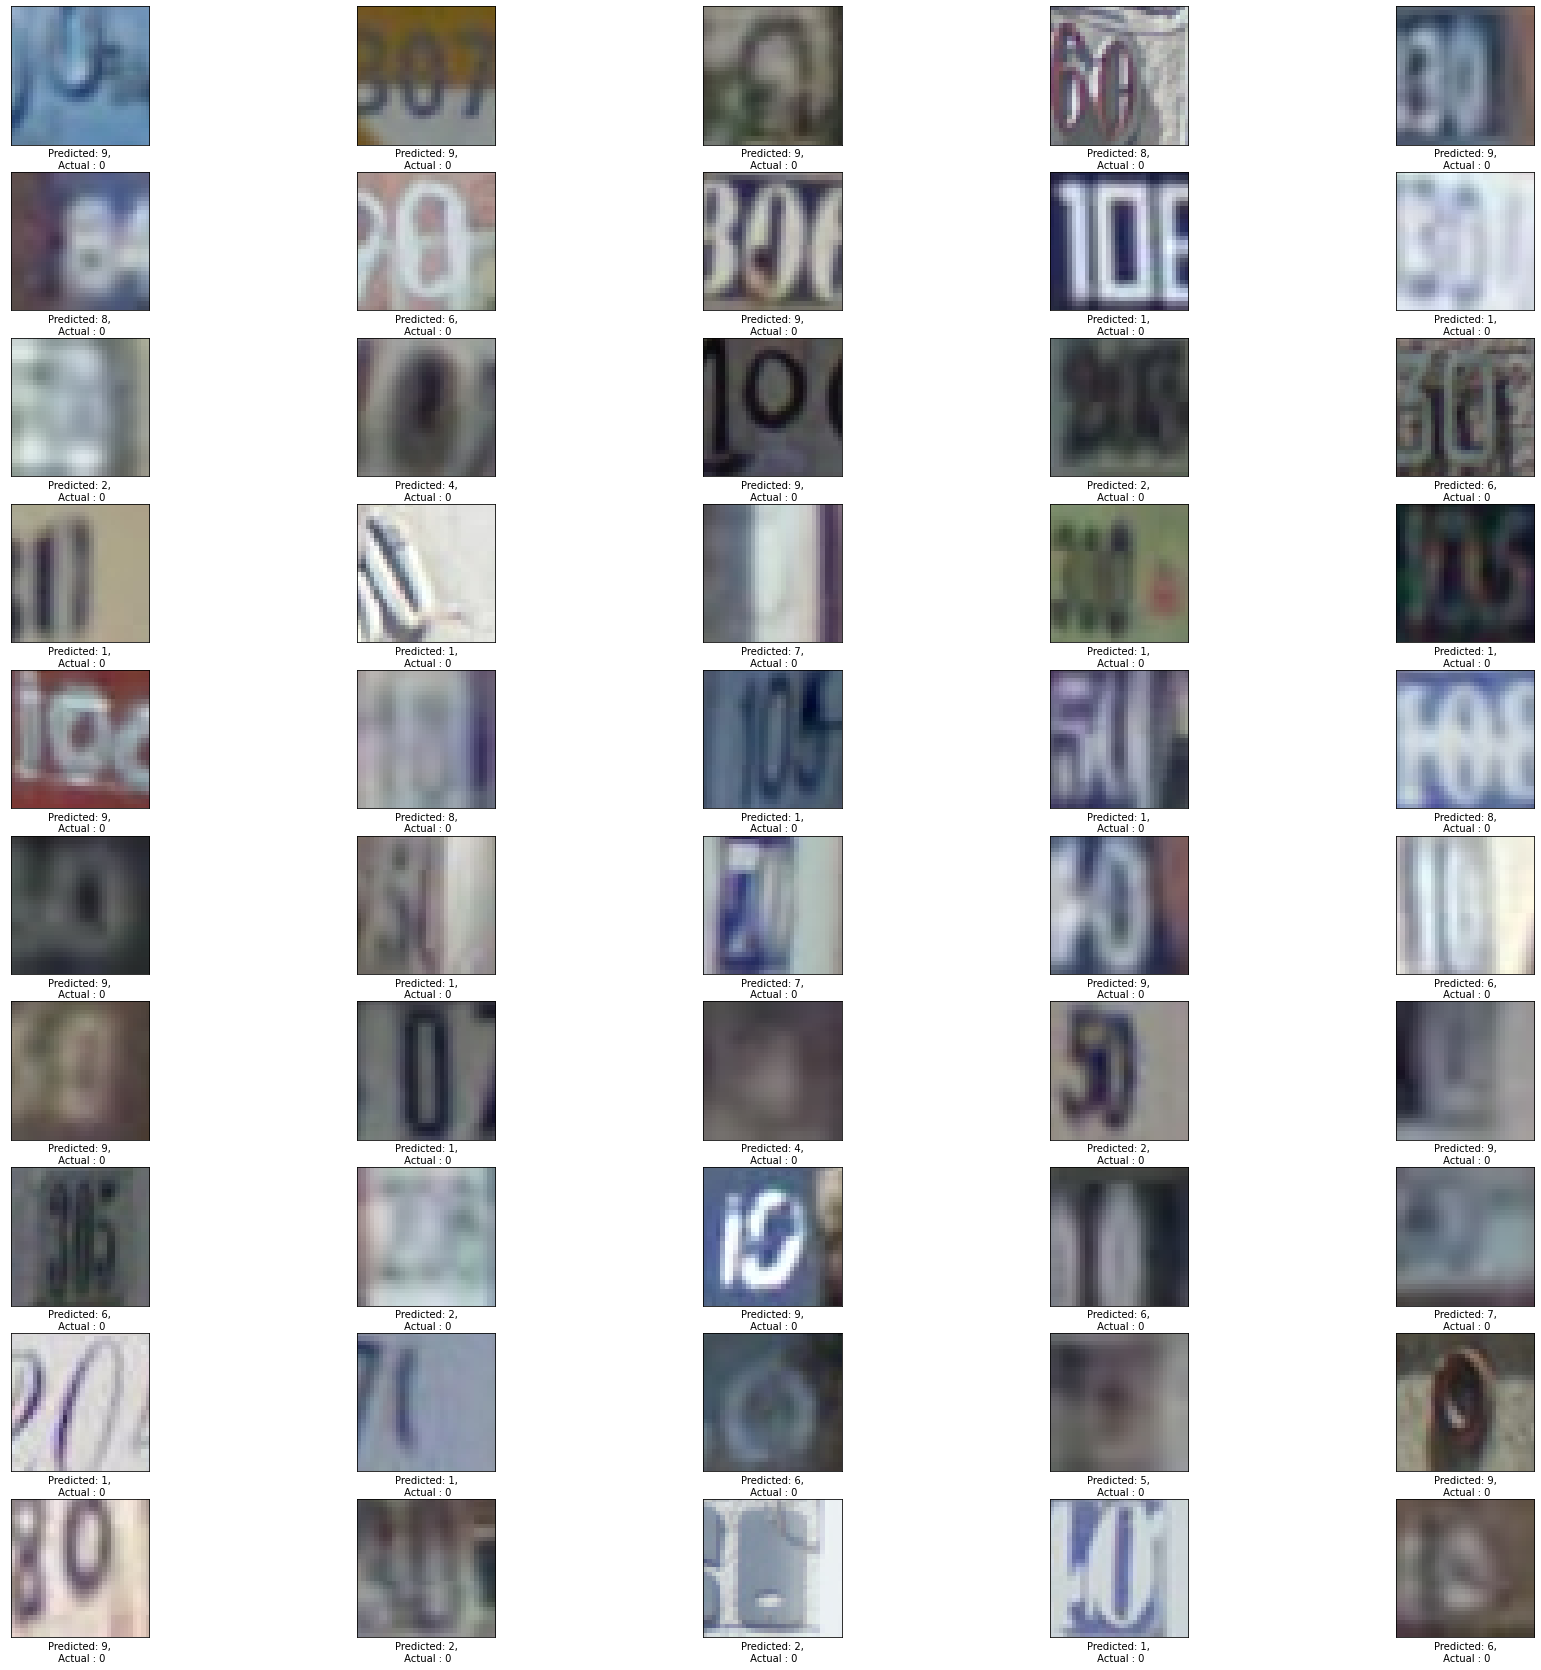

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

In subsequent layers, the patterns are a lot more abstract, but the "8" can still be seen in some of them. The last layer is very abstract, and as such hard to interpret, but does still show differing patterns. (length: 211)



Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_240 (Conv2D)          (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_110 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_175 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_245 (Dropout)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_241 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_246 (Dropout)        (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 11, 11, 128)    

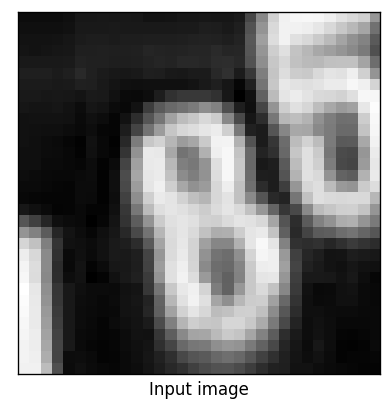

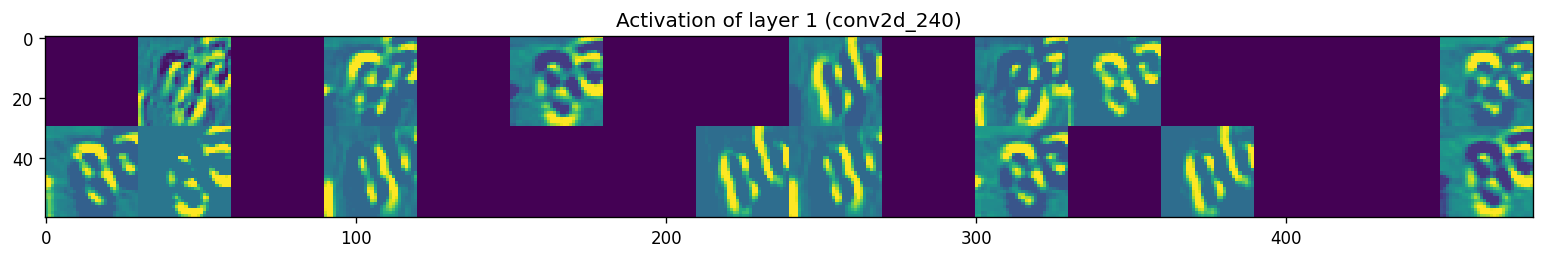

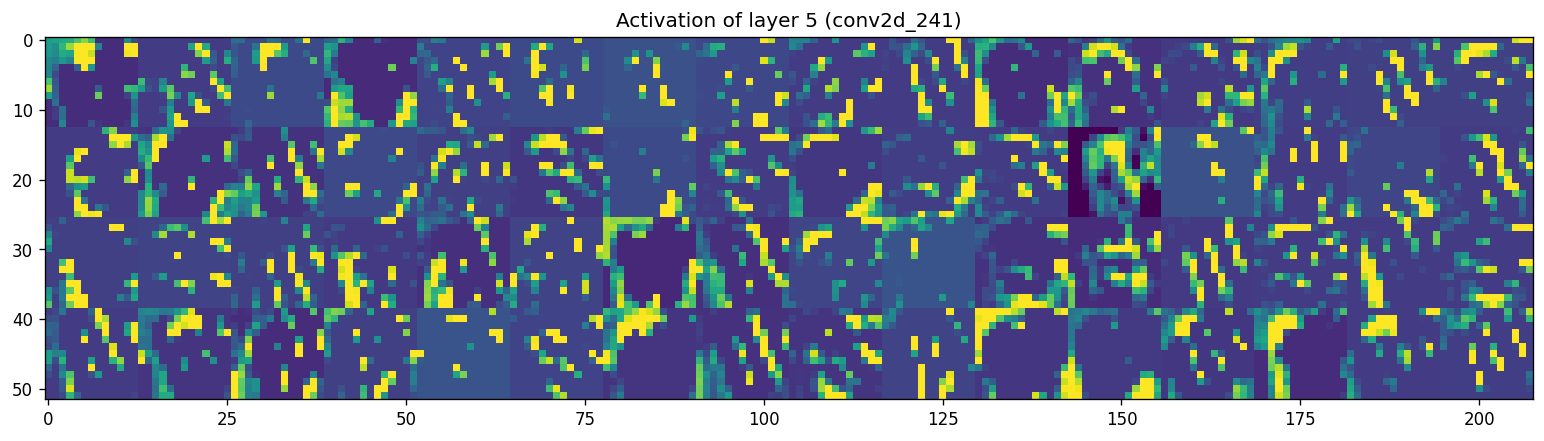

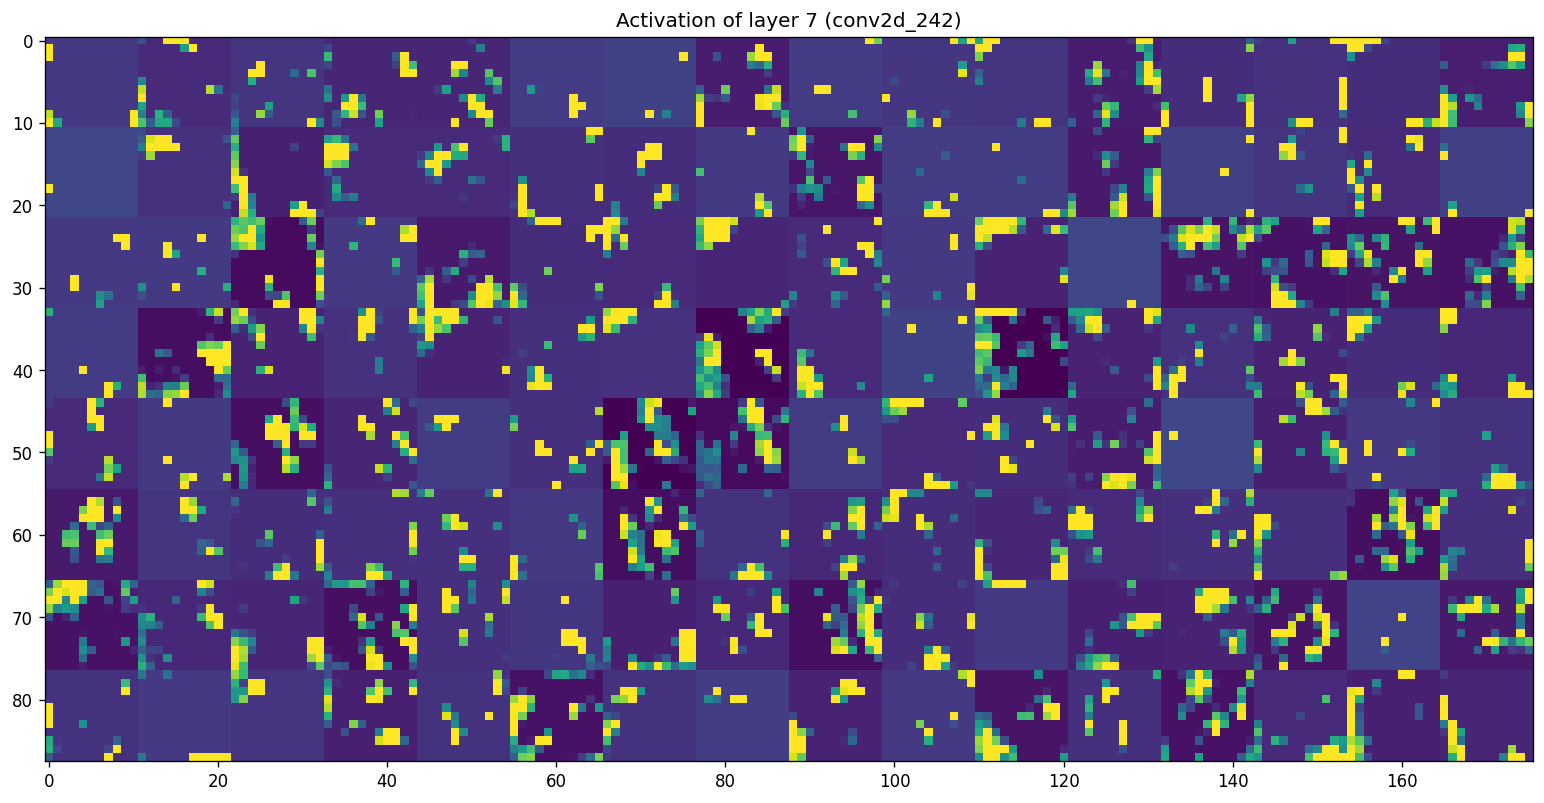

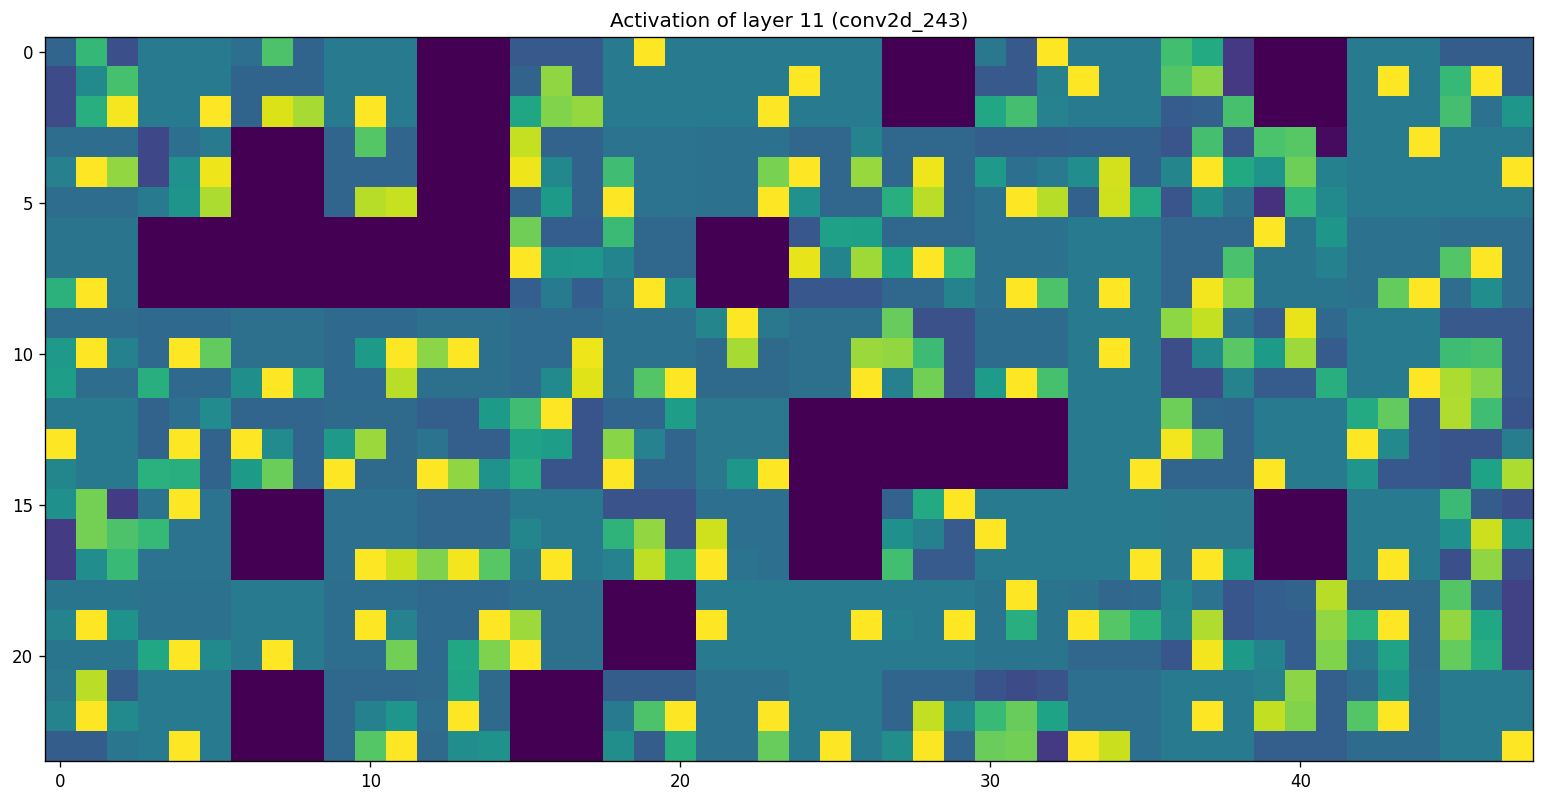

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

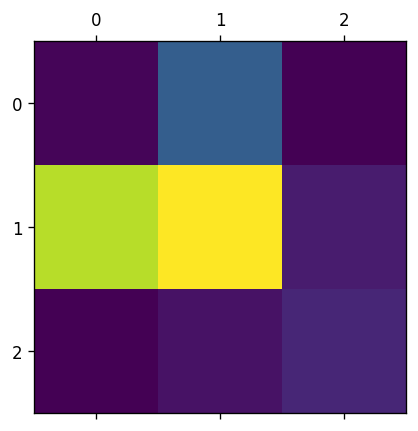

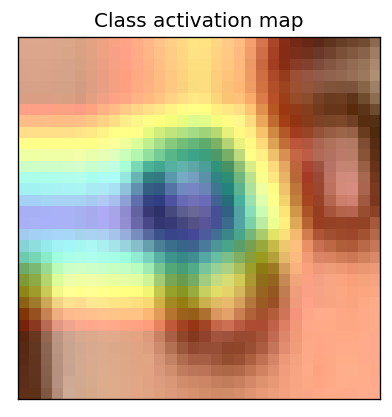

def plot_3_3():
    K.clear_session()
    
    model = load_model_from_file(base_dir, "model_2_2")
    
    # Preprocess test data
    p_x_test, p_y_test = rgb2gray(X_test), y_test
    
    sample_x = p_x_test[0]
    sample_y = p_y_test[0]
    
    x = np.expand_dims(sample_x, axis=0)
    
    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer('conv2d_243')
        iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))
        
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
    
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = heatmap.reshape((3, 3))
    plt.matshow(heatmap)
    plt.show()
    
    heatmap = cv2.resize(heatmap, (sample_x.shape[1], sam

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

which is a significant improvement, but does not yet match the performance of the model from scratch. Decreasing the learning rate to 1e-5 and trainig for 5 epochs increased this to 78%. (length: 187)



Max val score: 78.72%


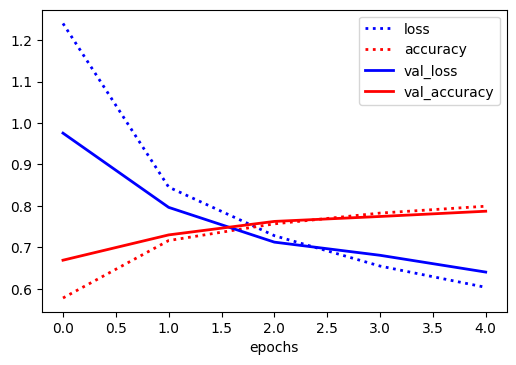

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)       

def build_model_4_1():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=Xr.shape[1:])

    model = models.Sequential()
    
    for layer in base_model.layers:
        model.add(layer)
    
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    # Freeze the base
    for layer in base_model.layers:
        layer.trainable = False
    
    model.get_layer('block5_conv1').trainable = True
    model.get_layer('block5_conv2').trainable = True
    model.get_layer('block5_conv3').trainable = True
    
    model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model



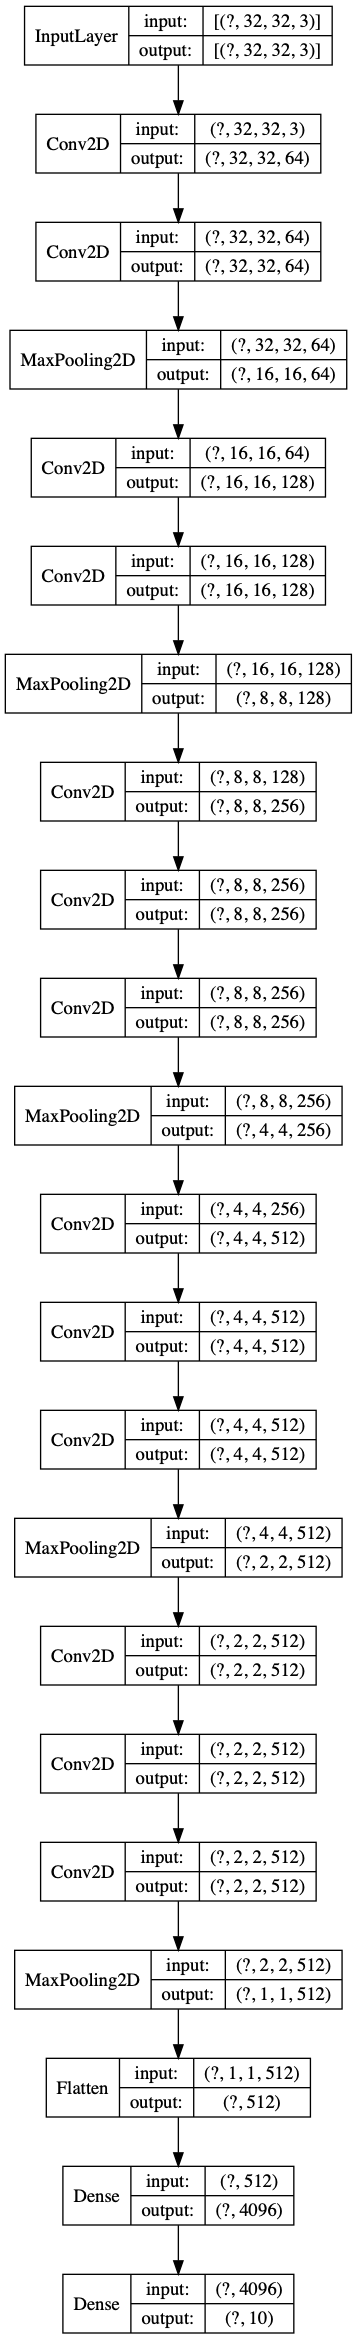

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

took much longer (although I'm now using theses results), and this model is less complex. With additional tuning, it would be possible to get a better score from this model. (length: 174)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('clf', LinearSVC(dual=False))])
def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    model = load_model_from_file(base_dir, "model_4_1")
    
    layer_outputs = [layer.output for layer in model.layers]
    # Remove the two dense layers, but keep the flatten layer
    layer_outputs = layer_outputs[:-2]
    
    embedding_model = models.Model(inputs=model.input, outputs=layer_outputs[-1])
    
    embedded_X_train = embedding_model.predict(X_train)
    store_embedding(embedded_X_train, 'X_train')
    
    embedded_X_test = embedding_model.predict(X_test)
    store_embedding(embedded_X_test, 'X_test')

def evaluation_4_2(X_train, y_train, X_test, y_tes

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 41.81 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
